<a href="https://colab.research.google.com/github/Elma-dev/titanic_data_analyse/blob/main/titanc_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
plt.rc('figure', figsize=(10, 5))

#**Import Data**

In [15]:
data=pd.read_csv('titanic.csv')

In [16]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#**Data Analyse**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [18]:
categorical_data=['Sex']
numerical_data=['Pclass','Siblings/Spouses Aboard','Parents/Children Aboard','Fare','Pclass']
result=['Survived']

In [19]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [20]:
#value of each features
print(f"Siblings/Spouses Aboard : {data['Siblings/Spouses Aboard'].unique()}")
print(f"Parents/Children Aboard : {data['Parents/Children Aboard'].unique()}")
print(f"Pclass : {data['Pclass'].unique()}")
print(f"Survived : {data['Survived'].unique()}")
print(f"Sex : {data['Sex'].unique()}")

Siblings/Spouses Aboard : [1 0 3 4 2 5 8]
Parents/Children Aboard : [0 1 2 5 3 4 6]
Pclass : [3 1 2]
Survived : [0 1]
Sex : ['male' 'female']


In [21]:
#Nane Value
data.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

**Analyse Numerical Data**

<ipython-input-22-324933461420>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

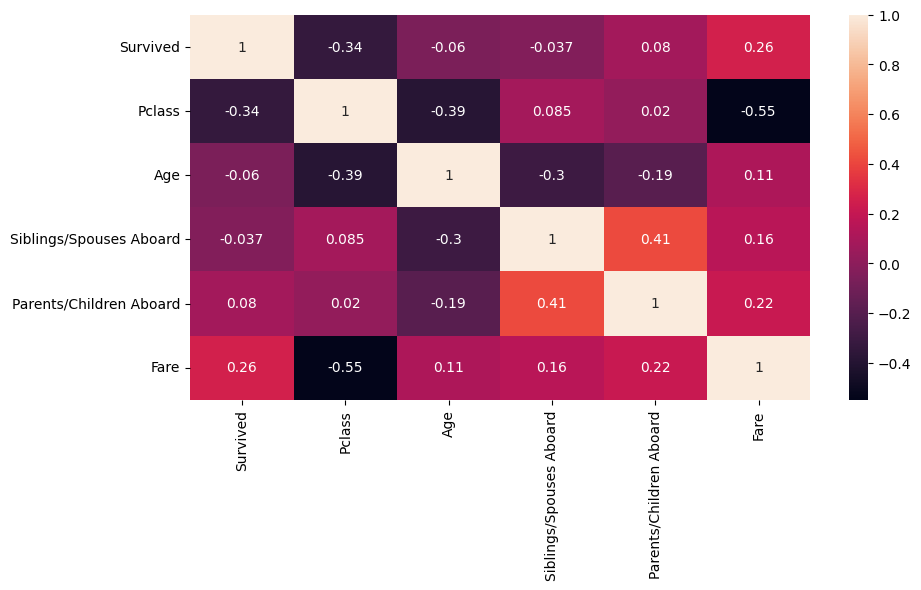

In [22]:
#Correlation
sns.heatmap(data.corr(),annot=True)

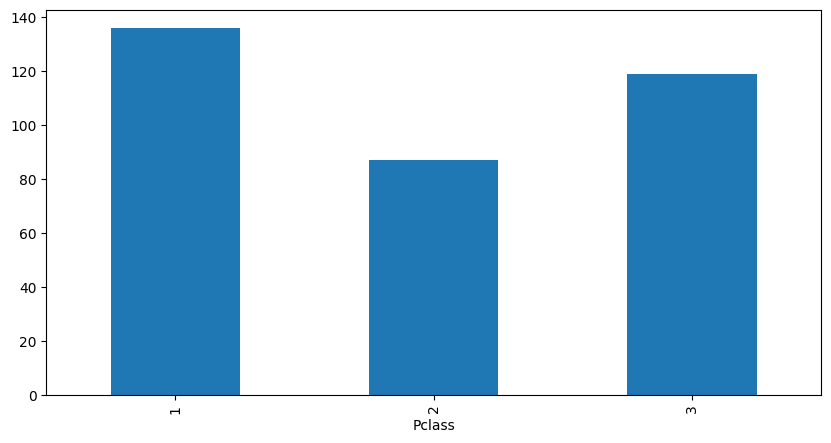

In [23]:
#Pclass Vs Survived
data.groupby('Pclass').Survived.sum().plot.bar()
plt.show()

In [39]:
fare_srv=data.groupby('Fare').Survived.sum().to_frame().reset_index()

<Axes: xlabel='Fare', ylabel='Survived'>

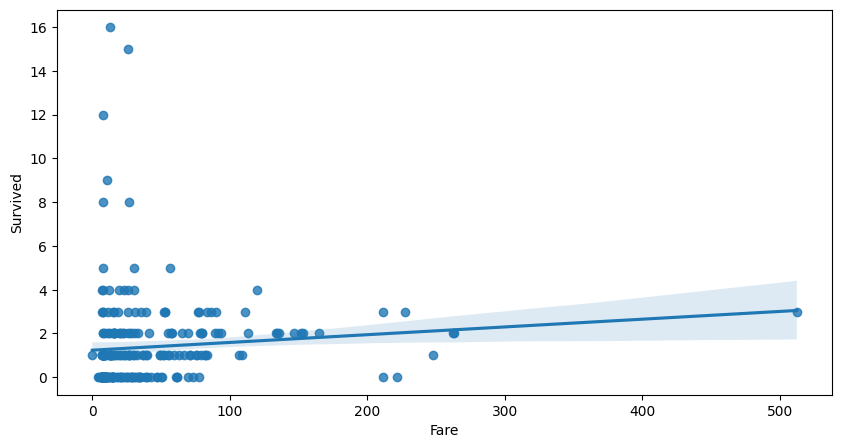

In [40]:
sns.regplot(data=fare_srv,x='Fare',y='Survived')

In [41]:
px.histogram(data_frame=fare_srv,x='Fare',y='Survived')

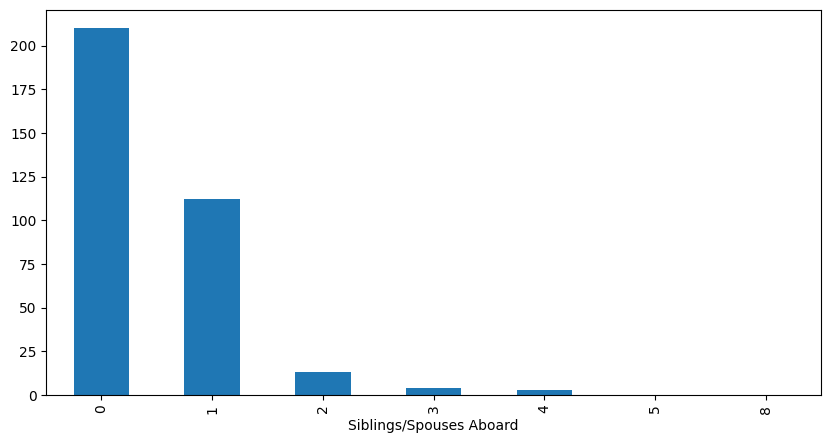

In [26]:
#Siblings/Spouses Aboard Vs Survived
data.groupby('Siblings/Spouses Aboard').Survived.sum().plot.bar()
plt.show()

<Axes: xlabel='Parents/Children Aboard'>

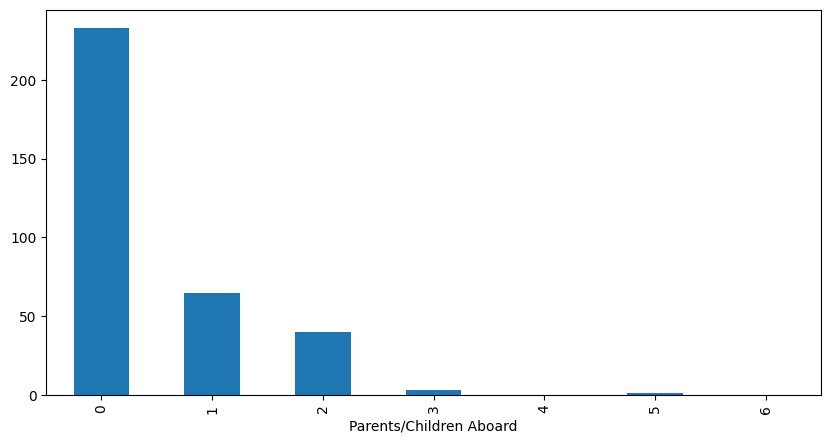

In [27]:
#Parents/Children Aboard Vs Survived
data.groupby('Parents/Children Aboard').Survived.sum().plot.bar()

<Axes: xlabel='Age', ylabel='Survived'>

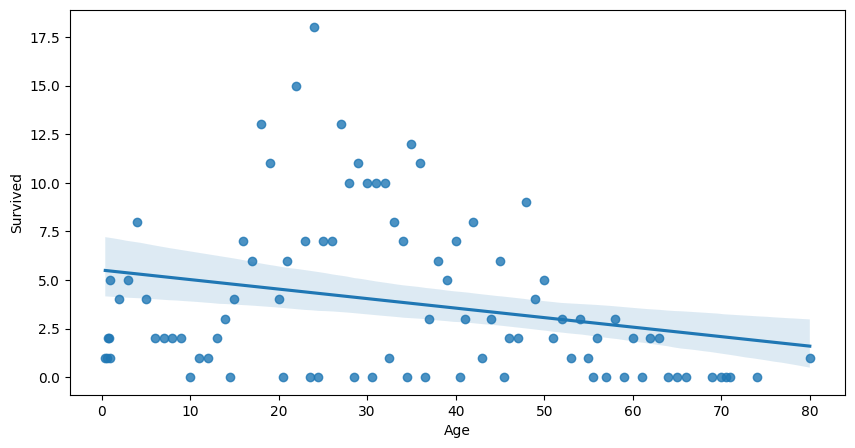

In [43]:
#Age Vs Survived
age_srv=data.groupby('Age').Survived.sum().reset_index()
sns.regplot(data=age_srv,x='Age',y='Survived')

**Categorical Data Analyses**

In [29]:
import plotly.express as px
px.pie(data_frame=data,names='Sex',values='Survived')

In [44]:
px.histogram(data_frame=data,x='Pclass',y='Survived',color='Sex',text_auto='true')

In [45]:
px.histogram(data_frame=data,x='Parents/Children Aboard',y='Survived',color='Sex',text_auto='true')

# Data Preprocessing

## Missing Value

In [46]:
data.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

## Encoding Categorical Data

In [50]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
data['Sex']=labelEncoder.fit_transform(data['Sex'])

In [54]:
data.Sex.to_frame().head()

,Sex
0,1
1,0
2,0
3,0
4,1


## SplitOfData

In [61]:
X=data[['Sex','Parents/Children Aboard','Pclass','Fare','Siblings/Spouses Aboard']]
y=data['Survived']

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

## Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
standScaler_x=StandardScaler()
x_train_trans=standScaler_x.fit_transform(x_train)

# Chose ML Model

### LogisticRegression

In [66]:
from sklearn.linear_model import LogisticRegression
logisticRegression=LogisticRegression()

In [68]:
logisticRegression.fit(x_train_trans,y_train)

LogisticRegression()

In [69]:
logisticRegression.score(standScaler_x.transform(x_test),y_test)

0.7972972972972973

In [70]:
from sklearn.metrics import mean_squared_error
mean_squared_error(logisticRegression.predict(standScaler_x.transform(x_test)),y_test)

0.20270270270270271

<Axes: >

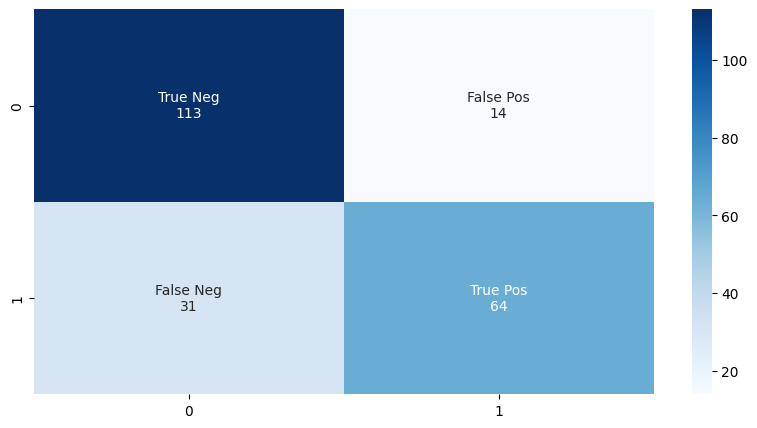

In [104]:
from sklearn.metrics import confusion_matrix


cf_matrix=confusion_matrix(y_test,y_predict)
labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
lab=[f'{b}\n{c}' for b,c in zip(labels,group_counts)]
lab = np.asarray(lab).reshape(2,2)
sns.heatmap(cf_matrix, annot=lab, fmt='', cmap='Blues')


### Model Math

0.36686678640551745
dj_db: 0.49861806546328574
dj_dw: [0.49833339 0.49883943]

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019839


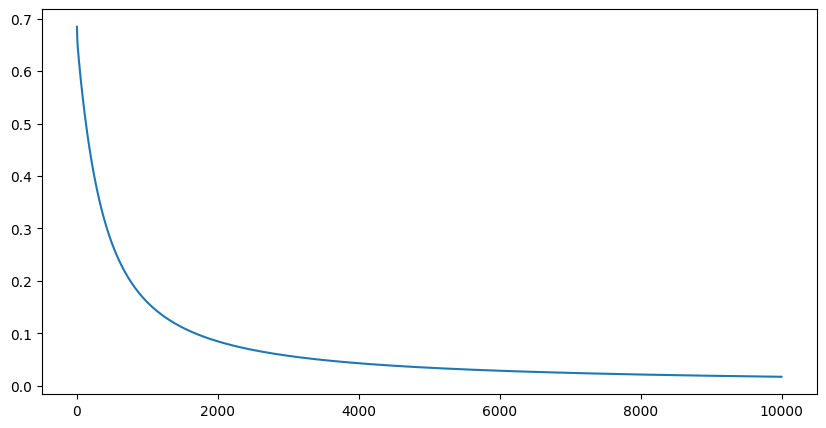

In [147]:
from abdeljalilFS import gradientDescent,sigmoid

In [156]:
w_tmp  = np.zeros_like(x_train.iloc[0,:])
b_tmp  = 0.
alph = 0.1
iters = 200

In [157]:
x_train_trans

array([[-1.37068883,  0.74243871,  0.78993659, -0.21039664,  0.47569741],
       [ 0.72956019, -0.47063683,  0.78993659, -0.33079295,  0.47569741],
       [ 0.72956019,  0.74243871,  0.78993659, -0.33191885,  0.47569741],
       ...,
       [-1.37068883, -0.47063683,  0.78993659, -0.46737561, -0.46578704],
       [ 0.72956019, -0.47063683,  0.78993659, -0.46954016, -0.46578704],
       [-1.37068883, -0.47063683, -0.42887508, -0.41293366, -0.46578704]])

In [158]:
w_,b_,erro=gradientDescent(w_tmp,x_train_trans,b_tmp,y_train.values,alph,iters)

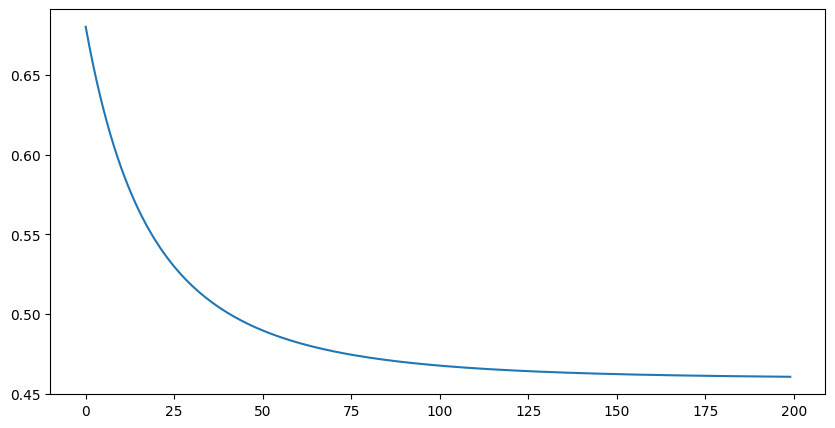

In [159]:
import matplotlib.pyplot as plt
plt.plot(range(iters),erro)

In [160]:
z=np.dot(standScaler_x.transform(x_test),w_)
y_predict=sigmoid(z)
y_predict[y_predict>=0.5]=1
y_predict[y_predict<0.5]=0

In [161]:
y_predict

array([0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0.])

In [162]:
from sklearn.metrics import accuracy_score, mean_squared_error
mean_squared_error(y_test,y_predict)

0.25675675675675674

In [164]:
accuracy_score(y_test,y_predict)

0.7432432432432432

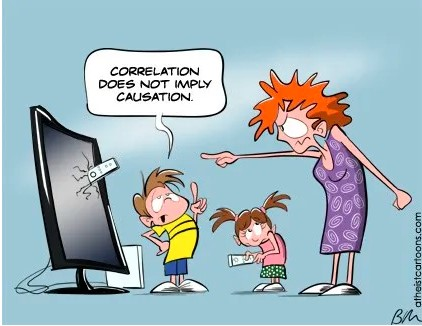

In [169]:
import cv2
img=cv2.imread("./corr_caus.jpg")

from google.colab.patches import cv2_imshow
cv2_imshow(img)